# Klasifikasi Penyakit Jantung Metode KNN

## Import library

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## Import dataset

In [134]:
dataset = pd.read_csv("heart.csv")

#dataset.drop(to_drop, inplace=True, axis=1)
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [135]:
# Menampilkan nilai attribute
x = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values
print(x)

[[40 'M' 'ATA' ... 'N' 0.0 'Up']
 [49 'F' 'NAP' ... 'N' 1.0 'Flat']
 [37 'M' 'ATA' ... 'N' 0.0 'Up']
 ...
 [57 'M' 'ASY' ... 'Y' 1.2 'Flat']
 [57 'F' 'ATA' ... 'N' 0.0 'Flat']
 [38 'M' 'NAP' ... 'N' 0.0 'Up']]


In [136]:
# Menampilkan nilai target
print(y)

[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 

## Mengubah Attribute kategorikal Menjadi angka

In [137]:
le = LabelEncoder()
x[:,1] = le.fit_transform(x[:,1])
print(x)

[[40 1 'ATA' ... 'N' 0.0 'Up']
 [49 0 'NAP' ... 'N' 1.0 'Flat']
 [37 1 'ATA' ... 'N' 0.0 'Up']
 ...
 [57 1 'ASY' ... 'Y' 1.2 'Flat']
 [57 0 'ATA' ... 'N' 0.0 'Flat']
 [38 1 'NAP' ... 'N' 0.0 'Up']]


In [138]:
le = LabelEncoder()
x[:,2] = le.fit_transform(x[:,2])
print(x)

[[40 1 1 ... 'N' 0.0 'Up']
 [49 0 2 ... 'N' 1.0 'Flat']
 [37 1 1 ... 'N' 0.0 'Up']
 ...
 [57 1 0 ... 'Y' 1.2 'Flat']
 [57 0 1 ... 'N' 0.0 'Flat']
 [38 1 2 ... 'N' 0.0 'Up']]


In [139]:
le = LabelEncoder()
x[:,6] = le.fit_transform(x[:,6])
print(x)

[[40 1 1 ... 'N' 0.0 'Up']
 [49 0 2 ... 'N' 1.0 'Flat']
 [37 1 1 ... 'N' 0.0 'Up']
 ...
 [57 1 0 ... 'Y' 1.2 'Flat']
 [57 0 1 ... 'N' 0.0 'Flat']
 [38 1 2 ... 'N' 0.0 'Up']]


In [140]:
le = LabelEncoder()
x[:,8] = le.fit_transform(x[:,8])
print(x)

[[40 1 1 ... 0 0.0 'Up']
 [49 0 2 ... 0 1.0 'Flat']
 [37 1 1 ... 0 0.0 'Up']
 ...
 [57 1 0 ... 1 1.2 'Flat']
 [57 0 1 ... 0 0.0 'Flat']
 [38 1 2 ... 0 0.0 'Up']]


In [141]:
le = LabelEncoder()
x[:,10] = le.fit_transform(x[:,10])
print(x)

[[40 1 1 ... 0 0.0 2]
 [49 0 2 ... 0 1.0 1]
 [37 1 1 ... 0 0.0 2]
 ...
 [57 1 0 ... 1 1.2 1]
 [57 0 1 ... 0 0.0 1]
 [38 1 2 ... 0 0.0 2]]


## Splitting the dataset into the Training set and Test set

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [143]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Mencari Nilai N Terbaik

In [196]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,21)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski')
    score = cross_val_score(knn, X_train, y_train)
    scores.append(np.mean(score))
print(k_values)
print(scores)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.8241404845022744, 0.8124722310377658, 0.8488733735322121, 0.8343065693430656, 0.845911350893896, 0.8415635248069396, 0.8473500476039352, 0.8415635248069396, 0.8546281603723684, 0.8517507669522901, 0.847392362213054, 0.8503120702422511, 0.8575584470538453, 0.8488416375753729, 0.8575584470538453, 0.8546387390246484, 0.8546387390246484, 0.8502591769808527, 0.8517296096477308, 0.8517190309954513]


Text(0, 0.5, 'Accuracy Score')

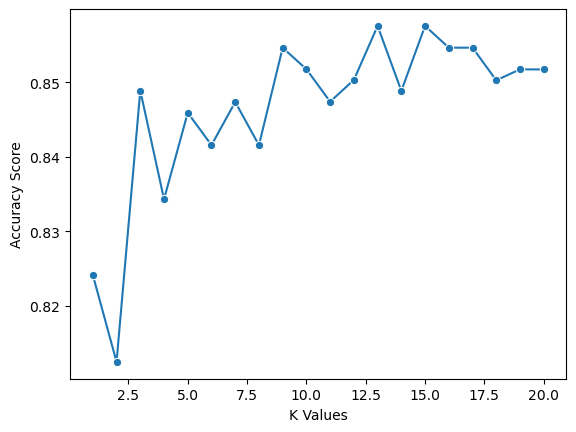

In [197]:
sns.lineplot(x = k_values, y = scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

## Training the K-NN model on the Training set

In [203]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

## Predicting the Test set results

In [204]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [205]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 76  16]
 [ 20 118]]


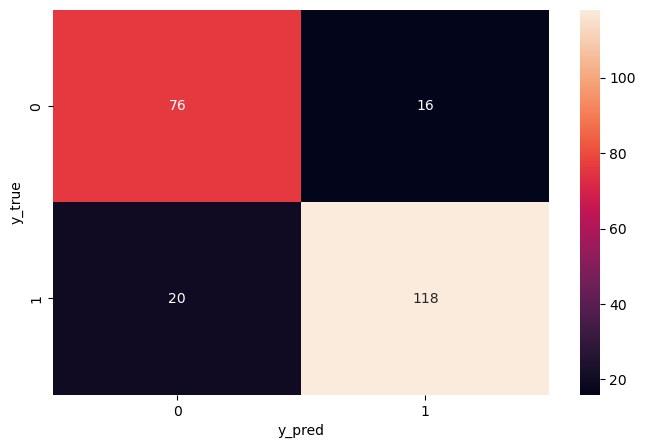

In [206]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Hasil validasi

In [207]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        92
           1       0.88      0.86      0.87       138

    accuracy                           0.84       230
   macro avg       0.84      0.84      0.84       230
weighted avg       0.85      0.84      0.84       230



## Korelasi Antara Attribut

In [123]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index

C:\Users\MyAsus\AppData\Local\Temp\ipykernel_6736\1475992341.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = dataset.corr()


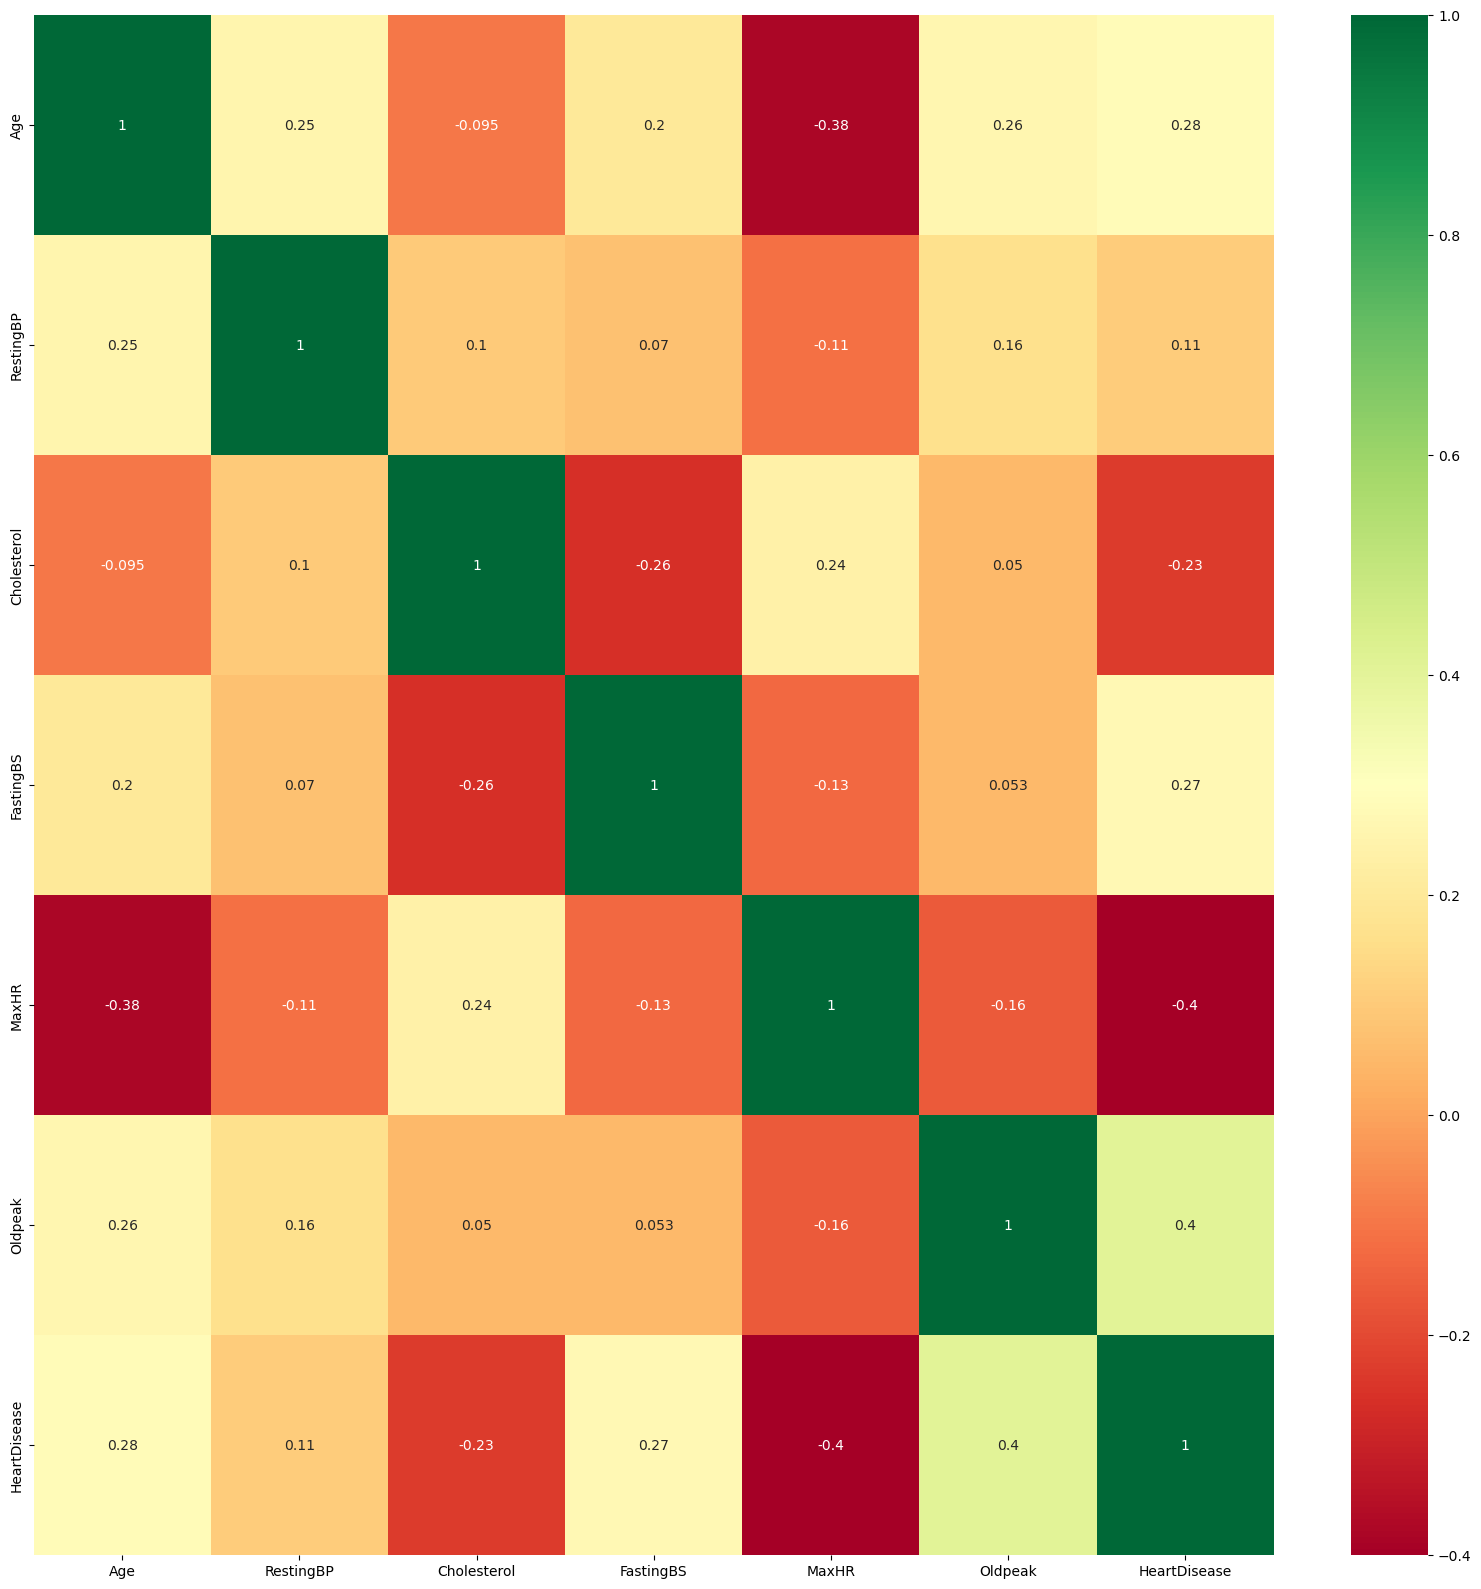

In [124]:
# plot heatmap 
plt.figure(figsize=(20,20))
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")